In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt

df=pd.read_excel('restaurants.xlsx')

<h1>DATA CLEAN

In [2]:
#remove titles
offender_index = df[df['happy']=="happy"].index
df= df.drop(offender_index)

#remove asia miles
asia_miles_index = df[df['food_type'].str.contains("eligible transactions")].index
df= df.drop(asia_miles_index)
df = df.reset_index()
df = df.drop('index',axis=1)

In [3]:
#drop duplicate entries with same name and location
df.drop_duplicates(subset=['name', 'location'], keep='last',inplace = True)

In [4]:
#change columns to float type
df['happy'] = df['happy'].astype(float)
df['sad'] = df['sad'].astype(float)
df['bookmark'] = df['bookmark'].astype(float)

In [5]:
#enable sort by price
df['price'] = pd.Categorical(df['price'], ['Below $50','$51-100', '$101-200', '$201-400', '$401-800', 'Above $801'])

In [6]:
#insert additional column of pure numeric prices
df['price_int'] = df['price'].replace({"Below $50":25,"$51-100":75,"$101-200":150,"$201-400":300,"$401-800":600,"Above $801":1000})


In [96]:
#define which food type to search
restaurant_type = ['Japanese','Western','Hong Kong Style','Guangdong','International','Taiwan','Korean','Thai','Italian','Sichuan']
restaurant_type_regex = "Japanese|Western|Hong Kong Style|Guangdong|International|Taiwan|Korean|Thai|Italian|Sichuan"

In [8]:
#filter out restaurants who are in the majority
df = df[df['food_type'].str.contains(restaurant_type_regex)]
df.reset_index(inplace = True)
df = df.drop('index',axis=1)

In [9]:
#give food type a number
food_model = OrdinalEncoder()
test = pd.DataFrame(food_model.fit_transform(df[['food_type']]))

df = pd.concat([df,test],axis=1,join='inner')
df = df.rename(columns={0:"food_int"})
df.shape

(1263, 9)

In [10]:
#give location type a number
location_model = OrdinalEncoder()
test = pd.DataFrame(location_model.fit_transform(df[['location']]))

df = pd.concat([df,test],axis=1,join='inner')
df = df.rename(columns={0:"location_int"})
df.shape

(1263, 10)

In [11]:
#introduce happy vs sad column
df['happy_vs_sad'] = df['happy']/df['sad']
df['happy_vs_sad'] = np.where(df['happy_vs_sad'] == np.inf, df['happy'], df['happy_vs_sad'])


<h1>USEFUL VISUALIZATION TOOLS

In [58]:
def bar_chart(column,x_axis = "variables",title = "graph of X",y_axis = "number of X"): #draws bar chart, input one array
    x = column.value_counts(sort=False).index
    y = column.value_counts(sort=False)

    fig = plt.figure(figsize = (10, 5))

    # creating the bar plot
    plt.bar(x, y, color ='orange',
            width = 0.4)

    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title(title)
    plt.show()

In [121]:
def scatter_graph(x,y,title): #draws a scatter graph, input two arrays
    m, b = np.polyfit(x, y, 1)
    plt.scatter(x, y, alpha=0.7)
    try:
        plt.plot(x, m*x + b)
    except:
        None
        
    try:
        #plt.title("{} vs {}".format(y.name, x.name))
        plt.xlabel(x.name)
        plt.ylabel(y.name)
    except:
        #plt.title("Title")
        plt.xlabel("X-Axis")
        plt.ylabel("Y-Axis")
    plt.title(title)
    plt.show()
    print("y intercept: ", b)

In [14]:
def find_average(df): #returns sad, happy, bookmark, price_int
    print("Average sad is: ",df['sad'].mean())
    print("Average happy is: ",df['happy'].mean())
    print("Average bookmark is: ",df['bookmark'].mean())
    print("Average price is: ",df['price_int'].mean())
    return df['sad'].mean(),df['happy'].mean(),df['bookmark'].mean(),df['price_int'].mean()

In [15]:
def scatter_matrix(df,columns = ['price','bookmark','happy','sad','happy_vs_sad'], dot_size = 30, fig_size = (20,20)):
    visual = pd.plotting.scatter_matrix(df[columns],marker = 'o', s=dot_size,  figsize=fig_size)

In [16]:
def color_scatter_matrix(df,food_or_loc,  columns = ['location_int','price_int','bookmark','happy','sad'], dot_size = 30, fig_size = (20,20)):
     
    if food_or_loc == 'food':
        visual = pd.plotting.scatter_matrix(df[columns],marker = 'o', c=df['food_int'] , s=dot_size,  figsize=fig_size)
        
    
    else: 
        visual = pd.plotting.scatter_matrix(df[columns],marker = 'o', c=df['location_int'] , s=dot_size,  figsize=fig_size)


In [17]:
def legend(food_loc): #finds legend for color_scatter_matrix

    if food_loc == 'food':
        base_tags = pd.DataFrame(list(range(df['food_int'].nunique())))
        plt.imshow([np.unique(df['food_int'])])
        plt.xticks(ticks=np.unique(df['food_int']),labels=food_model.inverse_transform(base_tags))
    else:
        base_tags = pd.DataFrame(list(range(df['location_int'].nunique())))
        plt.imshow([np.unique(df['location_int'])])
        plt.xticks(ticks=np.unique(df['location_int']),labels=location_model.inverse_transform(base_tags))

<h1> Conduct Analysis

In [18]:
df['food_type'].unique()

array(['Guangdong', 'International', 'Korean', 'Western', 'Japanese',
       'Hong Kong Style', 'Thai', 'Italian', 'Sichuan', 'Taiwan'],
      dtype=object)

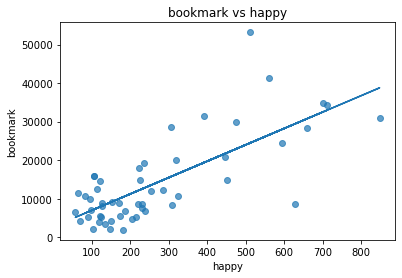

In [19]:
newdf = df.loc[(df['location']=="Mong Kok") & (df['food_type']=="Japanese")]
#color_scatter_matrix(newdf,'food')
scatter_graph(newdf['happy'],newdf['bookmark'])

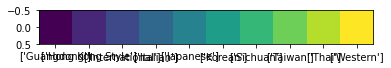

In [20]:
legend("food")

In [21]:
#top 200 restaurants ranked by happy
top_200 = df.sort_values('happy',ascending=False).iloc[0:200]


In [22]:
find_average(top_200)

Average sad is:  28.615
Average happy is:  578.61
Average bookmark is:  26911.935
Average price is:  223.0


(28.615, 578.61, 26911.935, 223.0)

/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20803 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26391 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20803 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 26391 missing from current font.
  font.set_text(s, 0, flags=flags)


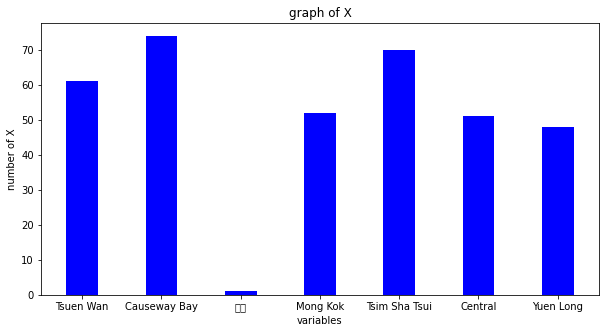

In [23]:
newdf = df[df['food_type']=="Japanese"]
bar_chart(newdf['location'])

In [24]:
find_average(df[df['location']=="Tsim Sha Tsui"])

Average sad is:  17.76847290640394
Average happy is:  324.1576354679803
Average bookmark is:  19497.39408866995
Average price is:  238.30049261083744


(17.76847290640394, 324.1576354679803, 19497.39408866995, 238.30049261083744)

In [25]:
find_average(df[df['location']=="Mong Kok"])

Average sad is:  16.25877192982456
Average happy is:  284.37280701754383
Average bookmark is:  15486.956140350878
Average price is:  160.08771929824562


(16.25877192982456, 284.37280701754383, 15486.956140350878, 160.08771929824562)

In [26]:
find_average(df[df['location']=="Causeway Bay"])

Average sad is:  10.728971962616823
Average happy is:  258.3644859813084
Average bookmark is:  13401.766355140187
Average price is:  236.21495327102804


(10.728971962616823, 258.3644859813084, 13401.766355140187, 236.21495327102804)

In [27]:
find_average(df[df['location']=="Central"])

Average sad is:  9.095238095238095
Average happy is:  133.51322751322752
Average bookmark is:  11879.10582010582
Average price is:  289.9470899470899


(9.095238095238095, 133.51322751322752, 11879.10582010582, 289.9470899470899)

In [28]:
find_average(df[df['location']=="Yuen Long"])

Average sad is:  6.768867924528302
Average happy is:  93.35849056603773
Average bookmark is:  4326.7169811320755
Average price is:  137.6179245283019


(6.768867924528302, 93.35849056603773, 4326.7169811320755, 137.6179245283019)

In [29]:
find_average(df[df['location']=="Tsuen Wan"])

Average sad is:  9.173708920187794
Average happy is:  135.6056338028169
Average bookmark is:  5608.826291079812
Average price is:  120.89201877934272


(9.173708920187794, 135.6056338028169, 5608.826291079812, 120.89201877934272)

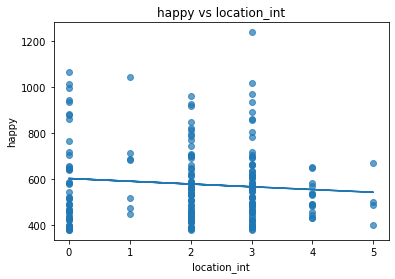

In [30]:
scatter_graph(top_200['location_int'],top_200['happy'])

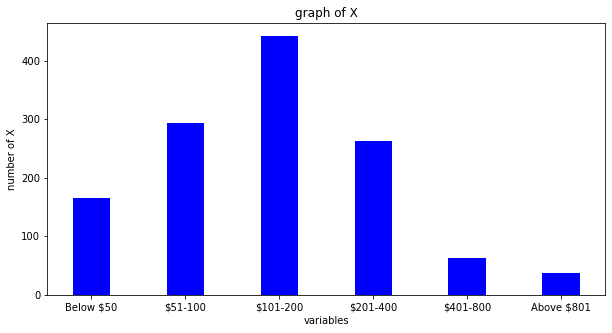

In [31]:
bar_chart(df['price'])

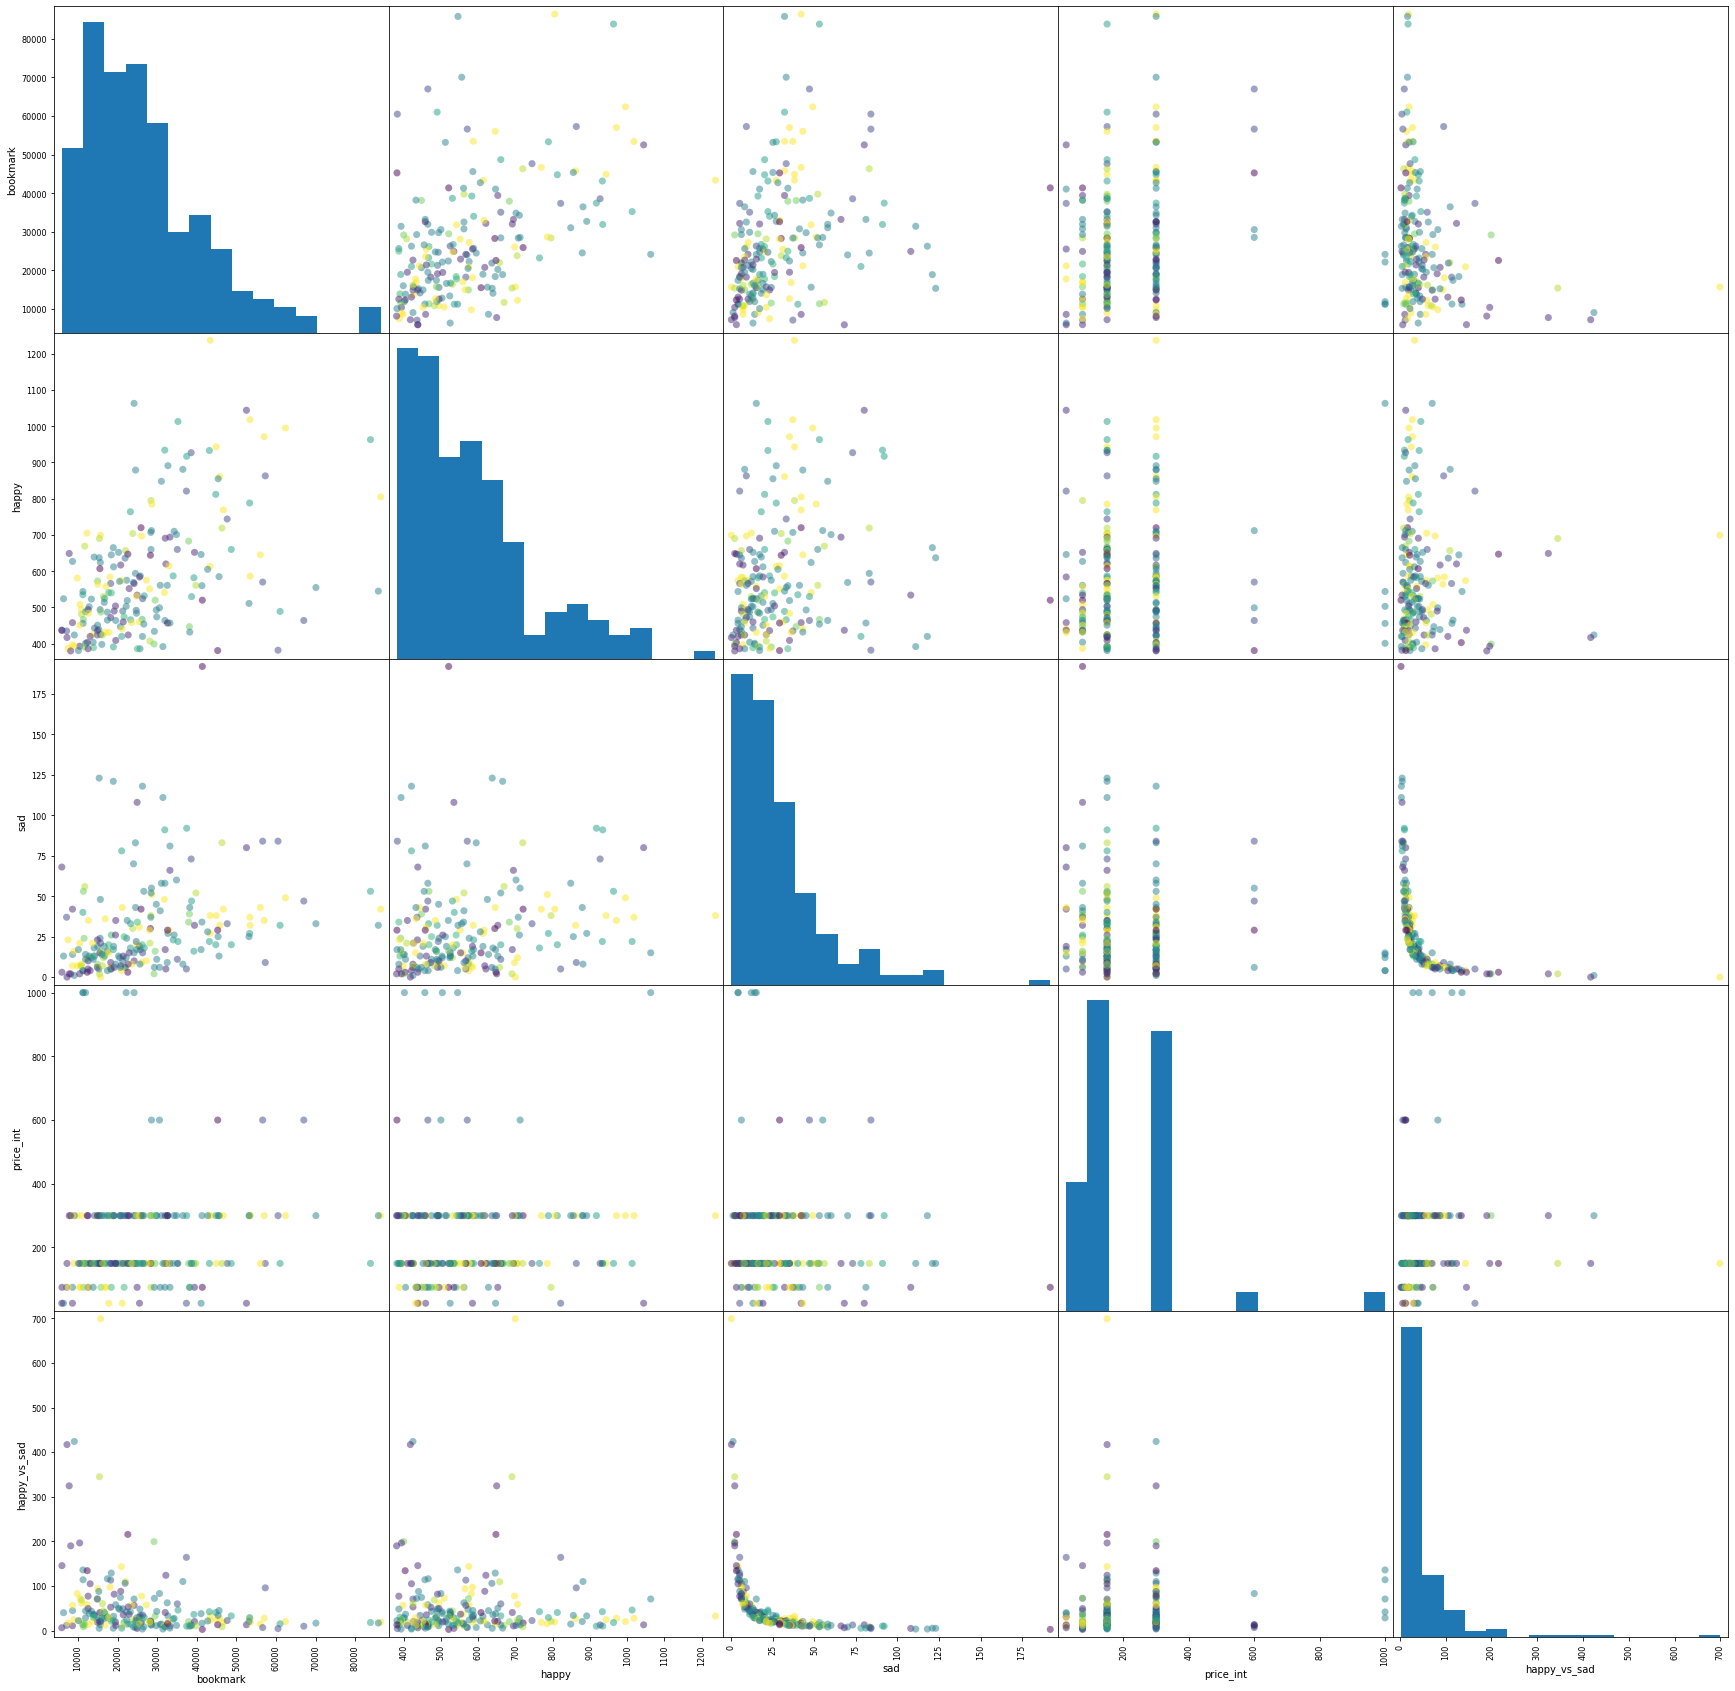

In [48]:
visual = pd.plotting.scatter_matrix(top_200[['bookmark','happy','sad','price_int','happy_vs_sad']],c=top_200['food_int'],marker = 'o', s=50, hist_kwds={'bins':15}, figsize=(30,30))


In [50]:
df[df['location']=="Mong Kok"].sort_values("happy_vs_sad",ascending=False).iloc[0:100]

,name,price,bookmark,happy,sad,food_type,location,price_int,food_int,location_int,happy_vs_sad
223,Lockeroom Dining (朗晴坊),$101-200,15698.0,699.0,0.0,Western,Mong Kok,150,9.0,2.0,699.000000
244,二鍋頭 (福苑),$101-200,7215.0,417.0,0.0,Hong Kong Style,Mong Kok,150,1.0,2.0,417.000000
243,Hey Pot 喜鍋 海鮮‧火鍋‧小廚,$201-400,7776.0,649.0,2.0,Hong Kong Style,Mong Kok,300,1.0,2.0,324.500000
277,Little Fresh Cafe & Bar,$101-200,12076.0,256.0,0.0,International,Mong Kok,150,2.0,2.0,256.000000
312,La Famille,Below $50,5226.0,215.0,1.0,Japanese,Mong Kok,25,4.0,2.0,215.000000
...,...,...,...,...,...,...,...,...,...,...,...
248,OPPA Korean Restaurant OPPA韓國燒肉店,$101-200,26722.0,532.0,18.0,Korean,Mong Kok,150,5.0,2.0,29.555556
237,Running BBQ Running 燒,$201-400,53335.0,788.0,27.0,Korean,Mong Kok,300,5.0,2.0,29.185185
395,Kokoro Sushi 鮨心,$201-400,18061.0,223.0,8.0,Japanese,Mong Kok,300,4.0,2.0,27.875000
318,Gyuugoku Stone Grill Steak (Tung Choi Street) ...,$51-100,8565.0,219.0,8.0,Japanese,Mong Kok,75,4.0,2.0,27.375000


In [72]:
Places = ['Causeway Bay','Central',"Yuen Long","Tsuen Wan","Tsim Sha Tsui","Mong Kok"]

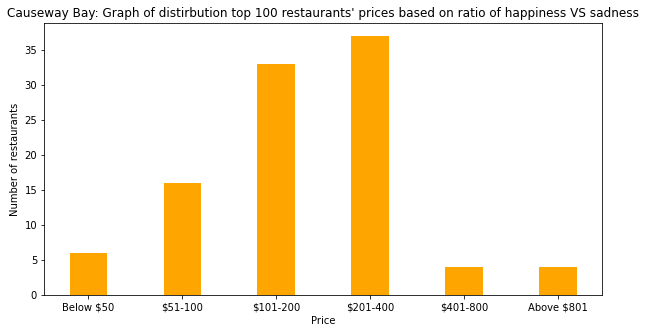

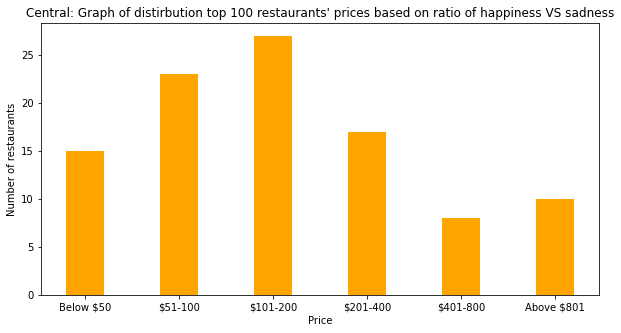

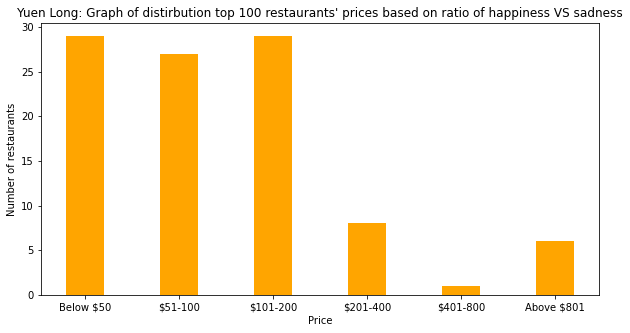

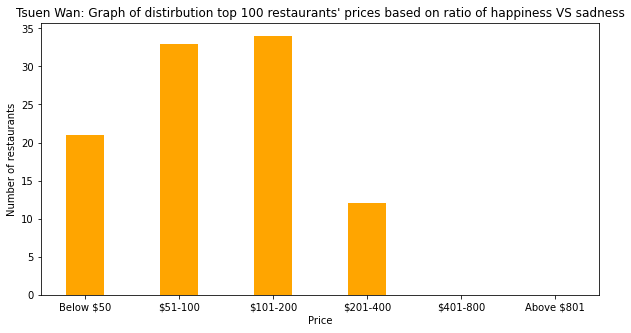

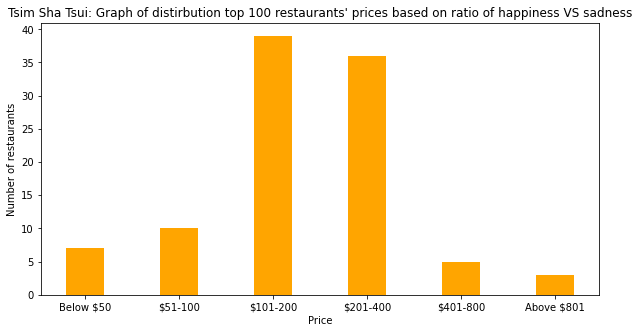

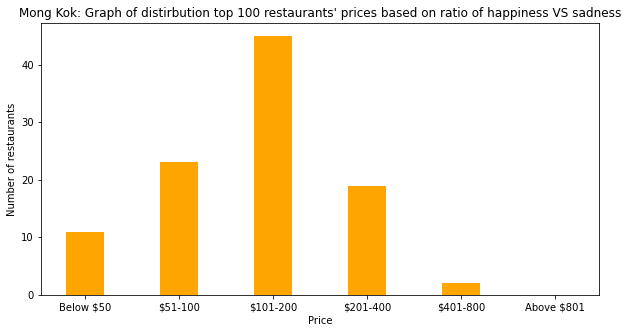

In [86]:
for i in Places:
    bar_chart(df[df['location']==i].sort_values("happy_vs_sad",ascending=False).iloc[0:100]['price'], "Price","{}: Graph of distirbution top 100 restaurants' prices based on ratio of happiness VS sadness".format(i), "Number of restaurants")

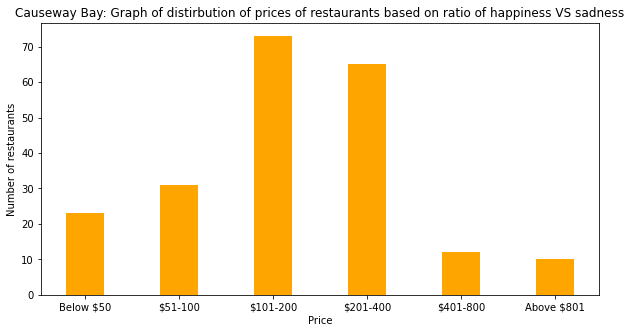

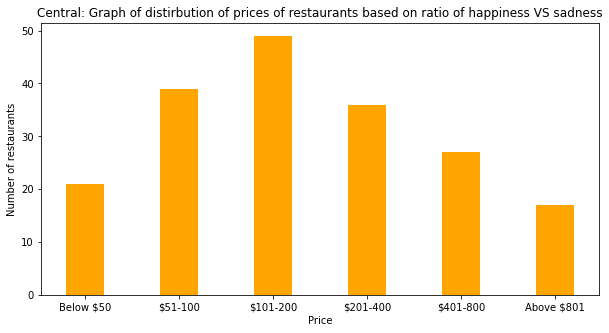

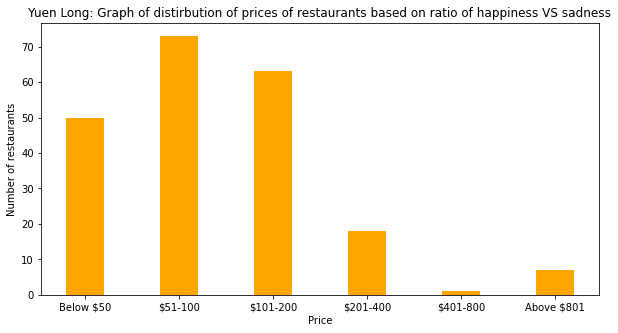

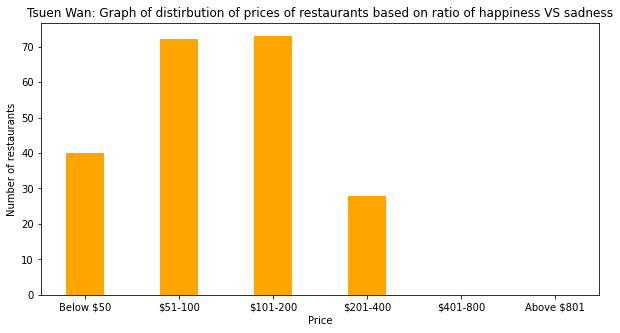

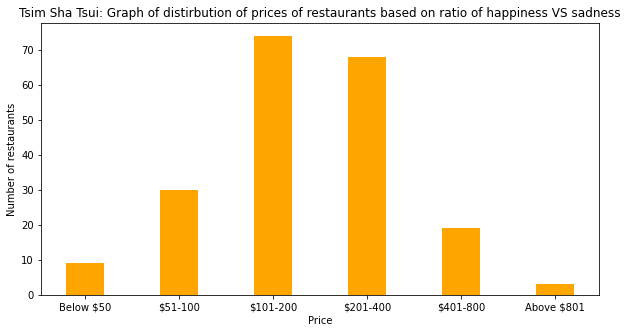

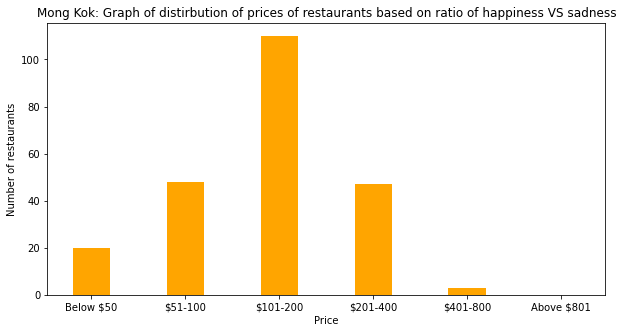

In [73]:
for i in Places:
    bar_chart(df[df['location']==i]['price'], "Price","{}: Graph of distirbution of prices of restaurants based on ratio of happiness VS sadness".format(i), "Number of restaurants")

In [94]:
#find average price in HK
for i in Places:
    print("Average price of a meal in {}:".format(i),df[df['location']==i]['price_int'].mean())

Average price of a meal in Causeway Bay: 236.21495327102804
Average price of a meal in Central: 289.9470899470899
Average price of a meal in Yuen Long: 137.6179245283019
Average price of a meal in Tsuen Wan: 120.89201877934272
Average price of a meal in Tsim Sha Tsui: 238.30049261083744
Average price of a meal in Mong Kok: 160.08771929824562


In [113]:
#find average price of meal in area
for i in Places:
    lowest = 10000000
    highest = 0
    restaurant_low = "error"
    restaurant_high = "error"
    for k in restaurant_type:
        mean_price = df.loc[(df['food_type']==k) & (df['location']==i)]['price_int'].mean()
        if mean_price < lowest:
            restaurant_low = k
            lowest = mean_price
        if mean_price > highest:
            restaurant_high = k
            highest = mean_price
        print("Average price of a {} meal in {}:".format(k,i),mean_price)
    print("-------------------------")
    print("Cheapest food is: {} meal, costing {}".format(restaurant_low, lowest))
    print("Most expensive food is: {} meal, costing {}".format(restaurant_high, highest))
    print("-------------------------")
    print("")

Average price of a Japanese meal in Causeway Bay: 352.36486486486484
Average price of a Western meal in Causeway Bay: 191.1290322580645
Average price of a Hong Kong Style meal in Causeway Bay: 120.83333333333333
Average price of a Guangdong meal in Causeway Bay: 267.6470588235294
Average price of a International meal in Causeway Bay: 193.75
Average price of a Taiwan meal in Causeway Bay: 85.9375
Average price of a Korean meal in Causeway Bay: 177.27272727272728
Average price of a Thai meal in Causeway Bay: 125.0
Average price of a Italian meal in Causeway Bay: 262.5
Average price of a Sichuan meal in Causeway Bay: 215.625
-------------------------
Cheapest food is: Taiwan meal, costing 85.9375
Most expensive food is: Japanese meal, costing 352.36486486486484
-------------------------

Average price of a Japanese meal in Central: 368.62745098039215
Average price of a Western meal in Central: 248.66071428571428
Average price of a Hong Kong Style meal in Central: 93.75
Average price of a 

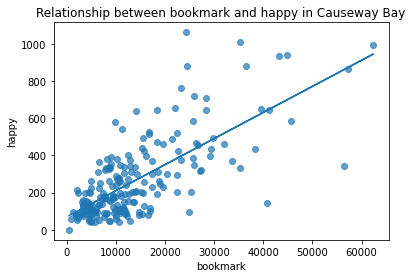

y intercept:  70.30746505251466


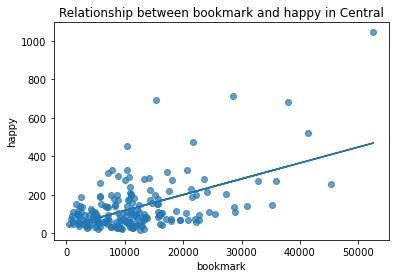

y intercept:  35.52553283952576


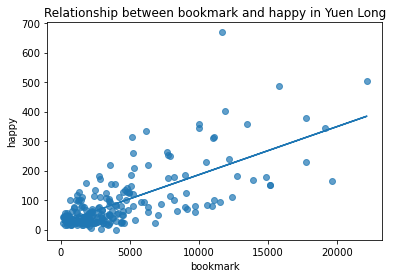

y intercept:  22.71274495911464


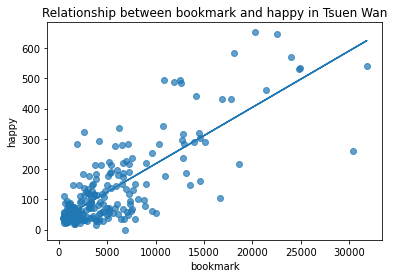

y intercept:  31.008689431754586


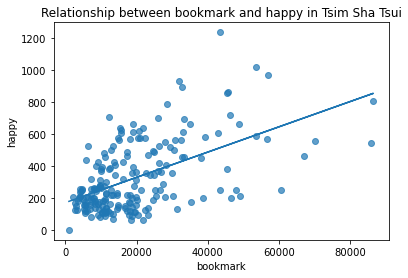

y intercept:  169.69678614422745


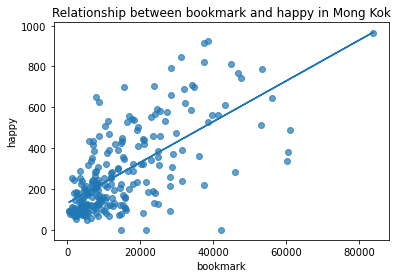

y intercept:  129.55524385844024


In [122]:
#bookmark VS happy
for i in Places:
    scatter_graph(df.loc[(df['location']==i)]['bookmark'],df.loc[(df['location']==i)]['happy'],"Relationship between bookmark and happy in {}".format(i))

In [115]:
df.loc[(df['location']=="Causeway Bay")]['bookmark']

0        395.0
1      57286.0
2      43170.0
3      44910.0
4      62380.0
        ...   
209     4842.0
210     2118.0
211      763.0
212    12458.0
213     3204.0
Name: bookmark, Length: 214, dtype: float64

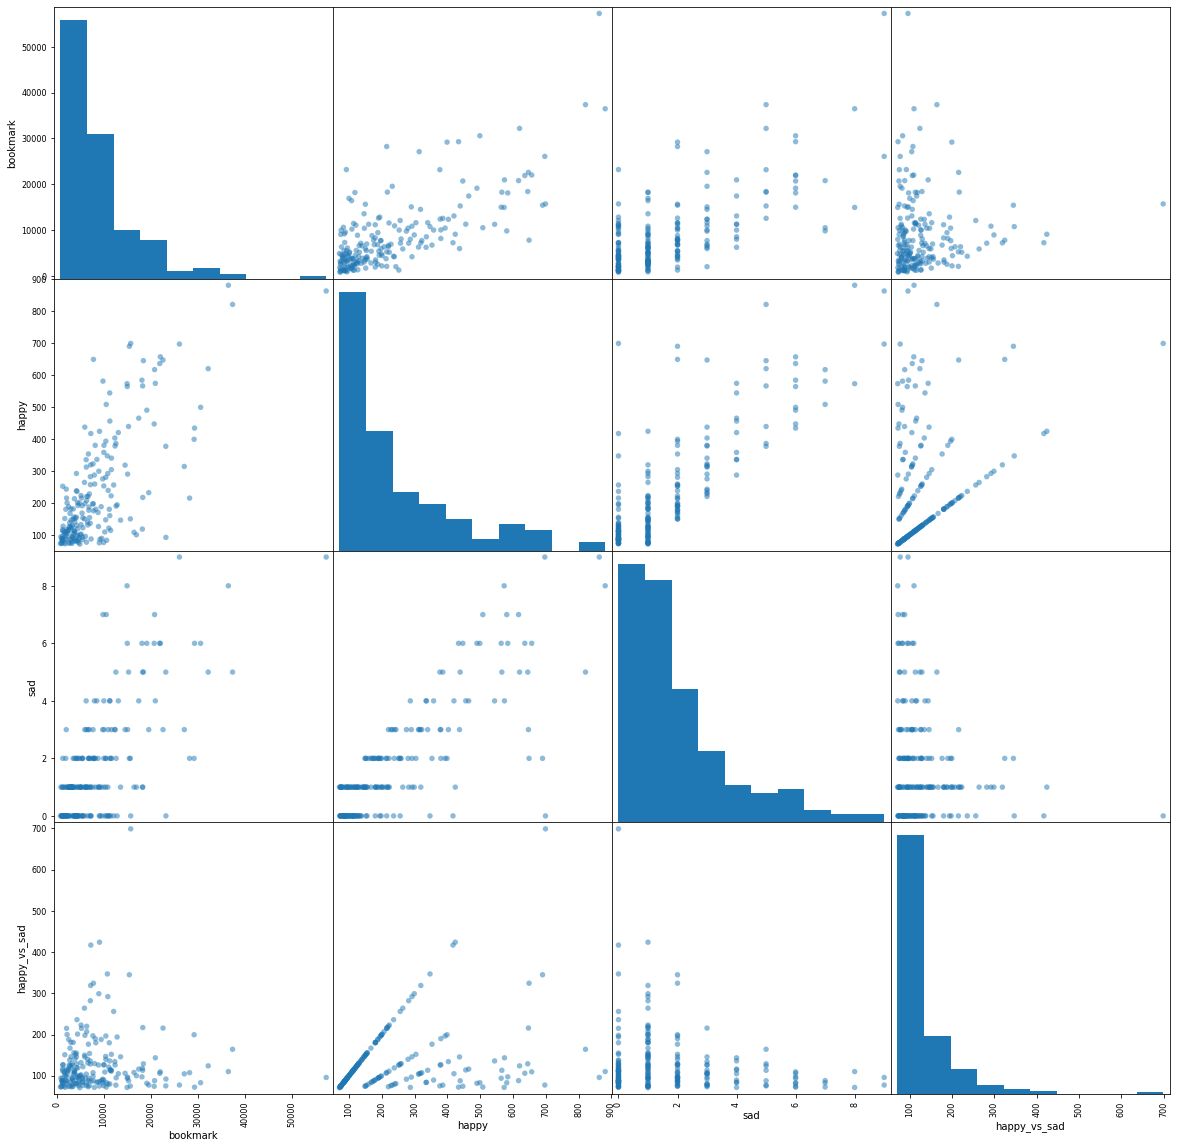

In [45]:
scatter_matrix(df.sort_values("happy_vs_sad",ascending=False).iloc[0:200])

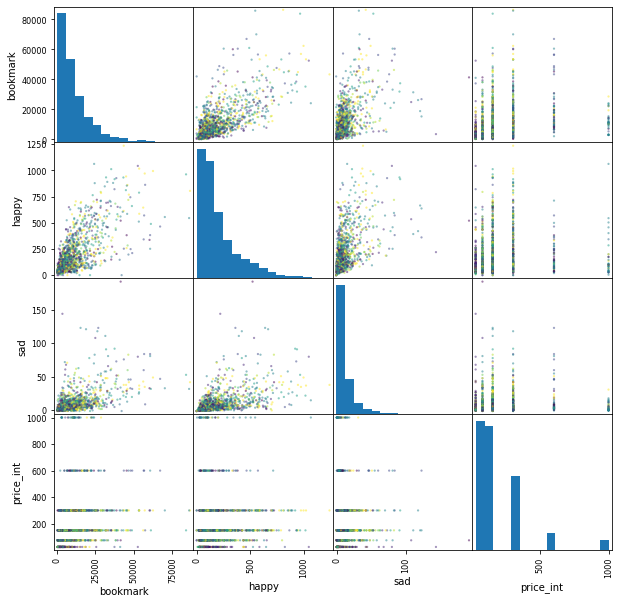

In [36]:
visual = pd.plotting.scatter_matrix(df[['bookmark','happy','sad','price_int']],c=df['food_int'],marker = 'o', s=5, hist_kwds={'bins':15}, figsize=(10,10))


([<matplotlib.axis.XTick at 0x7fb275248e50>,
 [Text(0.0, 0, "['Guangdong']"),
  Text(1.0, 0, "['Hong Kong Style']"),
  Text(2.0, 0, "['International']"),
  Text(3.0, 0, "['Italian']"),
  Text(4.0, 0, "['Japanese']"),
  Text(5.0, 0, "['Korean']"),
  Text(6.0, 0, "['Sichuan']"),
  Text(7.0, 0, "['Taiwan']"),
  Text(8.0, 0, "['Thai']"),
  Text(9.0, 0, "['Western']")])

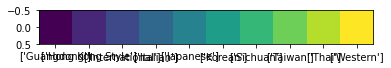

In [37]:
x = list(range(df['food_int'].nunique()))
x

#maps color to legend
base_tags = pd.DataFrame({0,1,2,3,4,5,6,7,8,9})
#model.inverse_transform(base_tags)

plt.imshow([np.unique(df['food_int'])])
plt.xticks(ticks=np.unique(df['food_int']),labels=food_model.inverse_transform(base_tags))
#_ = plt.xticks(ticks=np.unique(df['food']),labels=model.inverse_transform(base_tags))

([<matplotlib.axis.XTick at 0x7fb2755feca0>,
 [Text(0.0, 0, "['Guangdong']"),
  Text(1.0, 0, "['Hong Kong Style']"),
  Text(2.0, 0, "['International']"),
  Text(3.0, 0, "['Italian']"),
  Text(4.0, 0, "['Japanese']"),
  Text(5.0, 0, "['Korean']"),
  Text(6.0, 0, "['Sichuan']"),
  Text(7.0, 0, "['Taiwan']"),
  Text(8.0, 0, "['Thai']"),
  Text(9.0, 0, "['Western']")])

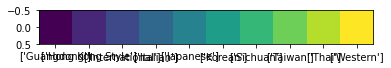

In [38]:
#maps color to legend
base_tags = pd.DataFrame({0,1,2,3,4,5,6,7,8,9})
#model.inverse_transform(base_tags)

plt.imshow([np.unique(df['food_int'])])
plt.xticks(ticks=np.unique(df['food_int']),labels=food_model.inverse_transform(base_tags))
#_ = plt.xticks(ticks=np.unique(df['food']),labels=model.inverse_transform(base_tags))

array([[<AxesSubplot:xlabel='bookmark', ylabel='bookmark'>,
        <AxesSubplot:xlabel='happy', ylabel='bookmark'>,
        <AxesSubplot:xlabel='sad', ylabel='bookmark'>,
        <AxesSubplot:xlabel='price_int', ylabel='bookmark'>],
       [<AxesSubplot:xlabel='bookmark', ylabel='happy'>,
        <AxesSubplot:xlabel='happy', ylabel='happy'>,
        <AxesSubplot:xlabel='sad', ylabel='happy'>,
        <AxesSubplot:xlabel='price_int', ylabel='happy'>],
       [<AxesSubplot:xlabel='bookmark', ylabel='sad'>,
        <AxesSubplot:xlabel='happy', ylabel='sad'>,
        <AxesSubplot:xlabel='sad', ylabel='sad'>,
        <AxesSubplot:xlabel='price_int', ylabel='sad'>],
       [<AxesSubplot:xlabel='bookmark', ylabel='price_int'>,
        <AxesSubplot:xlabel='happy', ylabel='price_int'>,
        <AxesSubplot:xlabel='sad', ylabel='price_int'>,
        <AxesSubplot:xlabel='price_int', ylabel='price_int'>]],
      dtype=object)

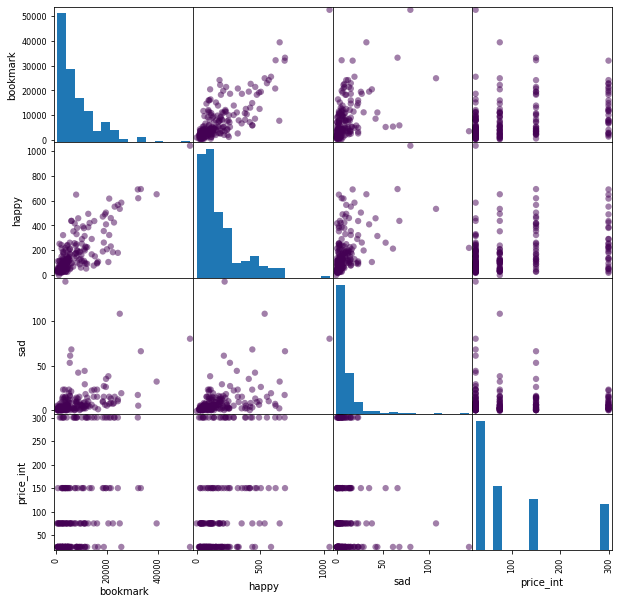

In [39]:
#visualize types of restaurants as a whole
pd.plotting.scatter_matrix(hk_style[['bookmark','happy','sad','price_int']], c = hk_style['food_int'],marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(10,10))

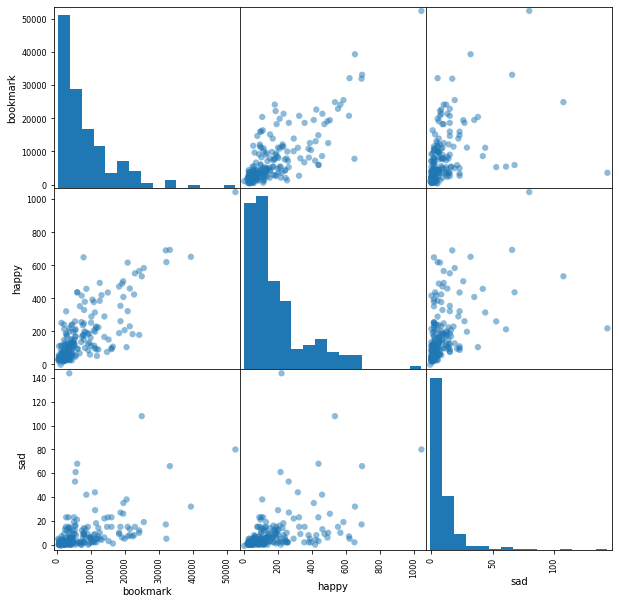

In [40]:
#visualize types of restaurants as a whole
visual = pd.plotting.scatter_matrix(hk_style[['price','bookmark','happy','sad']],marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(10,10))